<a href="https://colab.research.google.com/github/borislevant/cvplayground/blob/main/florence-2-tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install einops timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from unittest.mock import patch

from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM
from transformers.dynamic_module_utils import get_imports

def fixed_get_imports(filename):
    """Work around for https://huggingface.co/microsoft/phi-1_5/discussions/72."""
    if not str(filename).endswith("/modeling_florence2.py"):
        return get_imports(filename)
    imports = get_imports(filename)
    imports.remove("flash_attn")
    return imports

with patch("transformers.dynamic_module_utils.get_imports", fixed_get_imports):
    model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
    processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
!git clone https://github.com/borislevant/cvplayground

Cloning into 'cvplayground'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 124 (delta 37), reused 63 (delta 30), pack-reused 23
Receiving objects: 100% (124/124), 208.99 MiB | 27.72 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [4]:
prompt = "<OD>"

#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"

#image = Image.open('cvplayground/imgs/car.jpg')
image = Image.open('drive/MyDrive/pictures/IMG_20200525_190012.jpg')

inputs = processor(text=prompt, images=image, return_tensors="pt")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[3522.0, 1468.5, 3862.0, 1735.5], [3478.0, 1183.5, 3766.0, 1486.5], [3530.0, 1975.5, 3830.0, 2218.5], [3410.0, 1732.5, 3730.0, 1948.5], [670.0, 1291.5, 3830.0, 2500.5], [1446.0, 1000.5, 3858.0, 1735.5], [874.0, 1450.5, 1282.0, 1780.5], [1770.0, 1297.5, 2066.0, 1615.5], [1142.0, 1615.5, 1254.0, 1714.5], [1934.0, 1441.5, 2006.0, 1552.5], [1062.0, 1549.5, 1210.0, 1654.5]], 'labels': ['footwear', 'footwear', 'footwear', 'footwear', 'girl', 'girl', 'human face', 'human face', 'human mouth', 'human mouth', 'human nose']}}


TypeError: Image data of dtype object cannot be converted to float

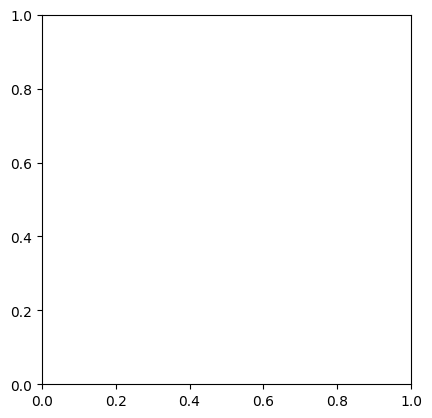

In [5]:
import matplotlib.pyplot as plt
from PIL import ImageDraw

image_box = ImageDraw.Draw(image)
for idx, l in enumerate(parsed_answer[prompt]['labels']):
    image_box.rectangle(parsed_answer[prompt]['bboxes'][idx], outline='red')

plt.imshow(image_box)
plt.show()